# Figure 1 - TCGA dataset overview

## Setups

In [4]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [7]:
# Plot settings 
col.pal <- colorRampPalette(colors = c("#ffffff","#FF0000"))

## Load data

In [14]:
fig_dir<-"output"
model.mt<-fread(file="input/cancer_models_summary.tsv")
mt<-fread(file="input/cancer_samples_summary.tsv") %>%
    mutate(cancer=factor(cancer,levels=c("SKCM","UVM","SARC","PRAD","TGCT",
                                                "OV","UCS","UCEC","CESC","LAML",
                                                "READ","BLCA","COAD","PAAD","CHOL",
                                               "KIRP","KIRC","KICH","ACC","PCPG",
                                               "STAD","LIHC","MESO","LUSC","LUAD",
                                               "BRCA","DLBC","THYM","THCA","ESCA",
                                               "HNSC","GBM","LGG")),
           name=factor(name,levels=c("Total","Tumor","Normal","Outliers","Stage0","Stage1","Stage2","Stage3","Stage4")))

### Visualizations

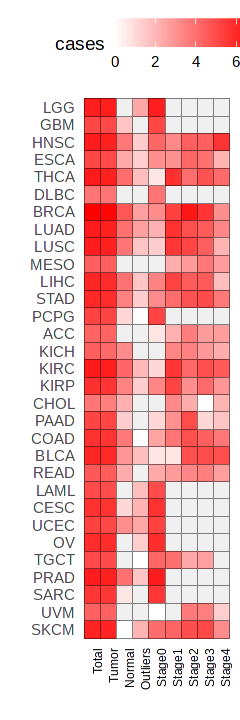

In [15]:
options(repr.plot.width=2,repr.plot.height=6)
p<-ggplot(mt,aes(x=cancer,y=name,fill=log(value)))+
    geom_tile(color="black")+
    scale_fill_gradientn(colours = col.pal(10),na.value = "#f0f0f0",)+
    theme(legend.position = "top",
          axis.text.x = element_text(size=7,color="black",angle=90,hjust=1),
          panel.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.ticks = element_blank())+
    coord_flip()+
    labs(fill="cases",x="",y="")
ggsave(p,file=file.path(fig_dir,"sample_summary.pdf"),device="pdf",width = 3,height = 9)
p

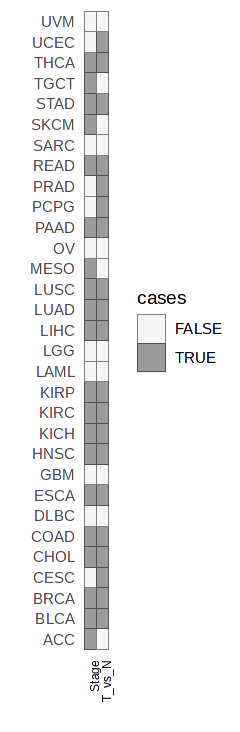

In [16]:
options(repr.plot.width=2,repr.plot.height=6.1)
p<-ggplot(model.mt,aes(x=cancer,y=name,fill=value))+
    geom_tile(color="black")+
    scale_fill_manual(values=c("#F5F5F5","#9B9B9B"))+
    theme(legend.position = "right",
          axis.text.x = element_text(size=7,color="black",angle=90,hjust=1),
          panel.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.ticks = element_blank())+
    coord_flip()+
    labs(fill="cases",x="",y="")
ggsave(p,file=file.path(fig_dir,"model_summary.pdf"),device="pdf",width = 3,height = 9)
p